# Creation of graphs

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc

In [69]:
pred_test_LR = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\test_predicted_LR1.csv')
pred_test_LLM = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\test_predicted_LLM1.csv')

pred_GPT3_LR = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\gpt_3_predicted_LR1.csv')
pred_GPT4_LR = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\gpt_4_predicted_LR1.csv')
pred_GPT3_LLM = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\gpt_3_predicted_LLM1.csv')
pred_GPT4_LLM = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\gpt_4_predicted_LLM1.csv')

pred_old_LLM = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\old_news_predicted_LLM1.csv')

pred_finance = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\finance_predicted_LLM1.csv')
pred_sport = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\sport_predicted_LLM1.csv')
pred_election = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\election_predicted_LLM1.csv')
pred_general = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\general_predicted_LLM1.csv')

In [85]:
pred_test_LR

,text,label,predictions
0,A spoof of typical 1980's teen movies. The ide...,0,0.122164
1,I was a victim of a false rape report by a fel...,1,0.987690
2,An artist's impression of the planet Kepler 46...,1,0.867020
3,During a live stream interview conducted by Dr...,0,0.092449
4,"""You guys have this thing for them,"" Mr. Trump...",1,0.863912
...,...,...,...
9995,"RICHMOND, Va. – Police responding to a report ...",1,0.916716
9996,New Delhi : A day after the Narendra Modi gove...,1,0.971078
9997,"""'Babysitting' scores points for sustaining a ...",0,0.007029
9998,"After five years of being unemployed, a 27-yea...",1,0.936194


## distribution of likelihoods

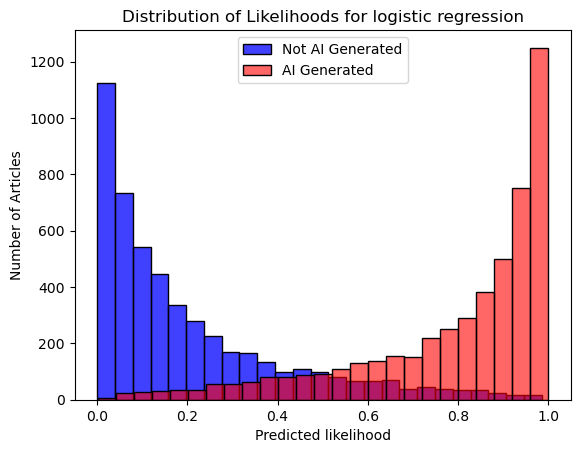

In [93]:
#sns.histplot(pred_test_LR['predictions'], bins=10, kde=True)
sns.histplot(data=pred_test_LR[pred_test_LR['label']==0], x='predictions', color='blue', bins=25, label='Not AI Generated')
sns.histplot(data=pred_test_LR[pred_test_LR['label']==1], x='predictions', color='red', bins=25, alpha=0.6, label='AI Generated')
plt.title('Distribution of Likelihoods for logistic regression')
plt.xlabel('Predicted likelihood')
plt.ylabel('Number of Articles')
plt.legend(loc='upper center')
#plt.show()
plt.savefig(r'C:\Users\Sten\Documents\EUR BAM\Thesis\graphs\test_lr.png')

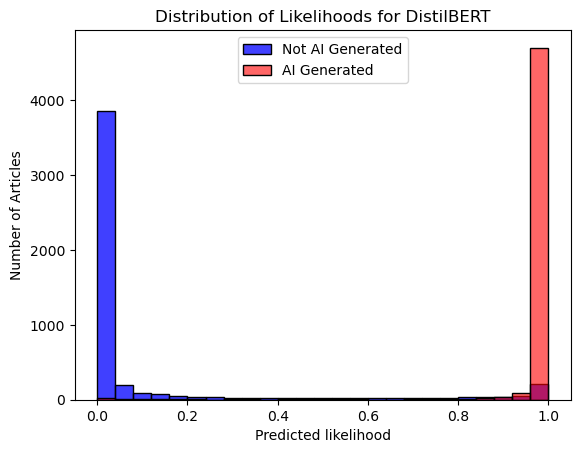

In [95]:
sns.histplot(data=pred_test_LLM[pred_test_LLM['label']==0], x='predictions', color='blue', bins=25, label='Not AI Generated')
sns.histplot(data=pred_test_LLM[pred_test_LLM['label']==1], x='predictions', color='red', bins=25, alpha=0.6, label='AI Generated')
plt.title('Distribution of Likelihoods for DistilBERT')
plt.xlabel('Predicted likelihood')
plt.ylabel('Number of Articles')
plt.legend(loc='upper center')
#plt.show()
plt.savefig(r'C:\Users\Sten\Documents\EUR BAM\Thesis\graphs\test_llm.png')

<AxesSubplot: xlabel='predictions', ylabel='Count'>

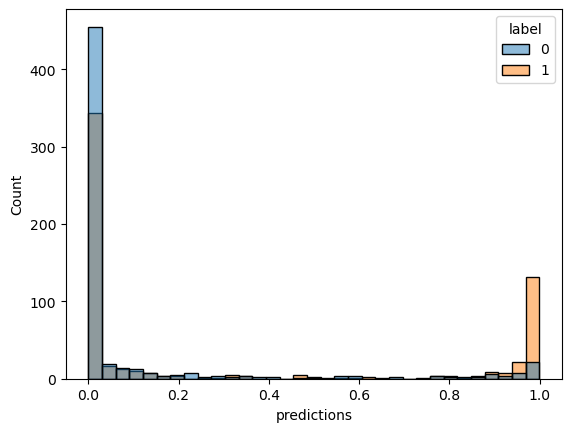

In [44]:
sns.histplot(data=pred_GPT3_LLM, x='predictions', hue='label')

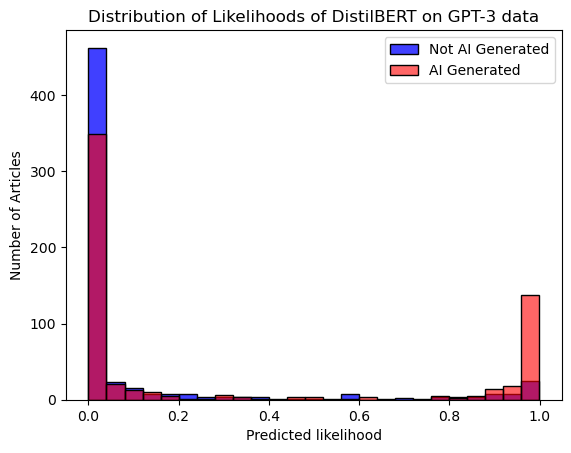

In [106]:
sns.histplot(data=pred_GPT3_LLM[pred_GPT3_LLM['label']==0], x='predictions', color='blue', bins=25, label='Not AI Generated')
sns.histplot(data=pred_GPT3_LLM[pred_GPT3_LLM['label']==1], x='predictions', color='red', bins=25, alpha=0.6, label='AI Generated')
plt.title('Distribution of Likelihoods of DistilBERT on GPT-3 data')
plt.xlabel('Predicted likelihood')
plt.ylabel('Number of Articles')
plt.legend()
#plt.show()
plt.savefig(r'C:\Users\Sten\Documents\EUR BAM\Thesis\graphs\gpt3_llm.png')

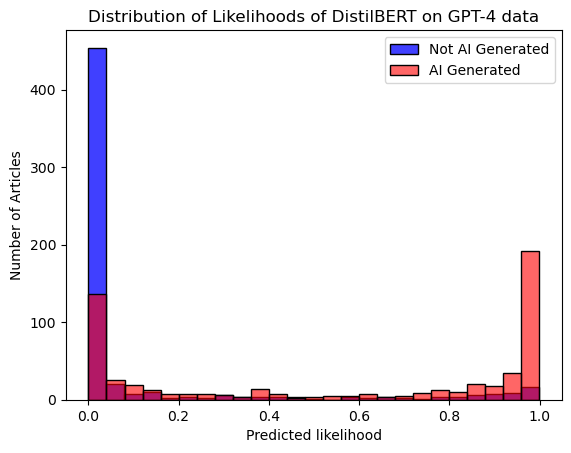

In [105]:
sns.histplot(data=pred_GPT4_LLM[pred_GPT4_LLM['label']==0], x='predictions', color='blue', bins=25,label='Not AI Generated')
sns.histplot(data=pred_GPT4_LLM[pred_GPT4_LLM['label']==1], x='predictions', color='red', bins=25, alpha=0.6, label='AI Generated')
plt.title('Distribution of Likelihoods of DistilBERT on GPT-4 data')
plt.xlabel('Predicted likelihood')
plt.ylabel('Number of Articles')
plt.legend()
#plt.show()
plt.savefig(r'C:\Users\Sten\Documents\EUR BAM\Thesis\graphs\gpt4_llm.png')

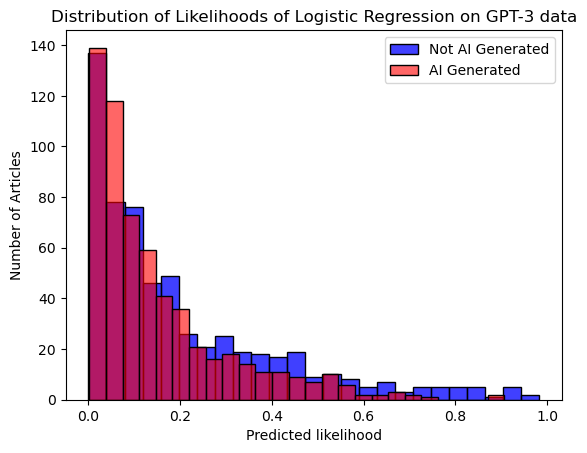

In [103]:
sns.histplot(data=pred_GPT3_LR[pred_GPT3_LR['label']==0], x='predictions', color='blue', bins=25, label='Not AI Generated')
sns.histplot(data=pred_GPT3_LR[pred_GPT3_LR['label']==1], x='predictions', color='red', bins=25, alpha=0.6, label='AI Generated')
plt.title('Distribution of Likelihoods of Logistic Regression on GPT-3 data')
plt.xlabel('Predicted likelihood')
plt.ylabel('Number of Articles')
plt.legend()
#plt.show()
plt.savefig(r'C:\Users\Sten\Documents\EUR BAM\Thesis\graphs\gpt3_lr.png')

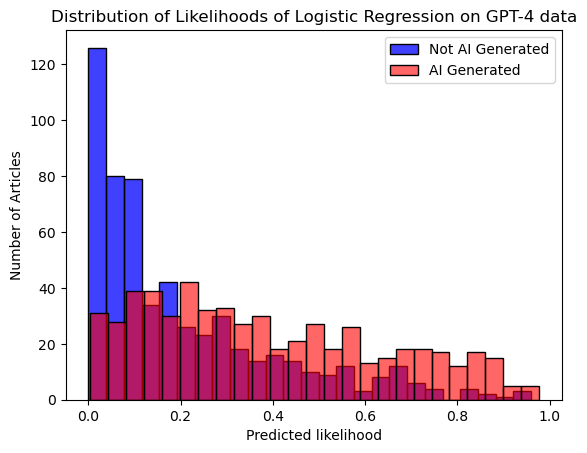

In [104]:
sns.histplot(data=pred_GPT4_LR[pred_GPT4_LR['label']==0], x='predictions', color='blue', bins=25, label='Not AI Generated')
sns.histplot(data=pred_GPT4_LR[pred_GPT4_LR['label']==1], x='predictions', color='red', bins=25, alpha=0.6, label='AI Generated')
plt.title('Distribution of Likelihoods of Logistic Regression on GPT-4 data')
plt.xlabel('Predicted likelihood')
plt.ylabel('Number of Articles')
plt.legend()
#plt.show()
plt.savefig(r'C:\Users\Sten\Documents\EUR BAM\Thesis\graphs\gpt4_lr.png')

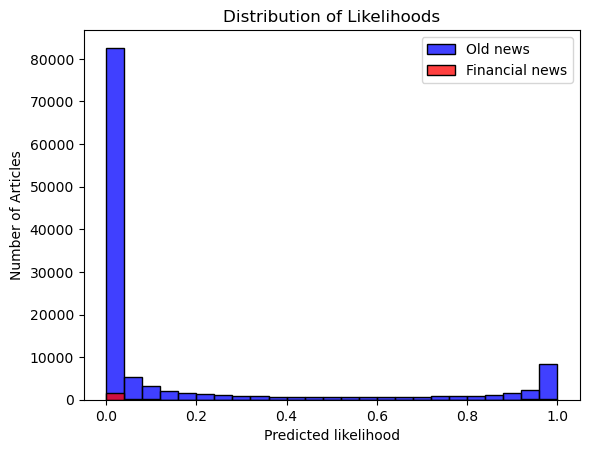

In [84]:
sns.histplot(pred_old_LLM['predictions'], color='blue', bins=25, label='Old news')
sns.histplot(pred_finance['predictions'], color='red', bins=25, label='Financial news')
plt.title('Distribution of Likelihoods')
plt.xlabel('Predicted likelihood')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

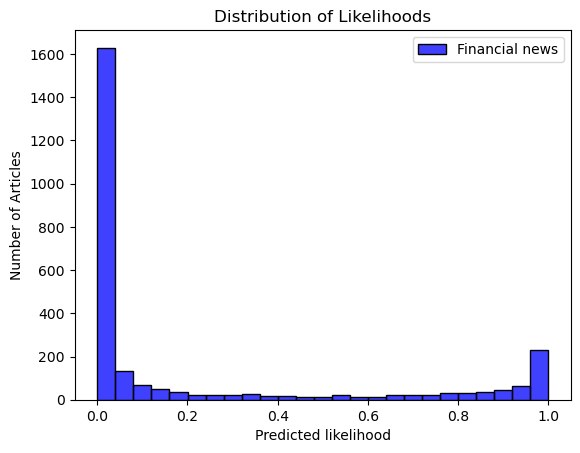

In [72]:
sns.histplot(pred_finance['predictions'], color='blue', bins=25, label='Financial news')
plt.title('Distribution of Likelihoods')
plt.xlabel('Predicted likelihood')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

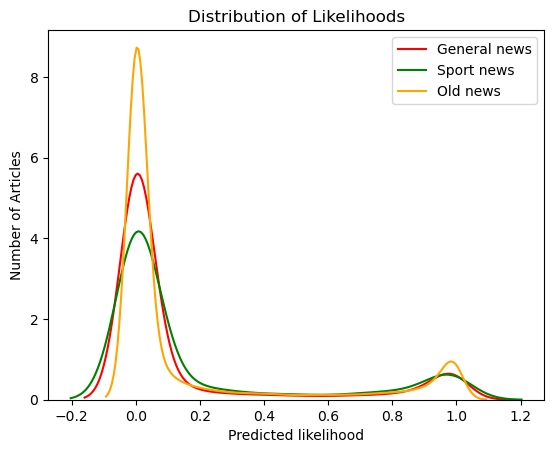

In [82]:
#sns.kdeplot(pred_finance['predictions'], color='blue', label='Financial news')
sns.kdeplot(pred_general['predictions'], color='red', label='General news')
sns.kdeplot(pred_sport['predictions'], color='green', label='Sport news')
#sns.kdeplot(pred_election['predictions'], color='orange', label='Election news')
sns.kdeplot(pred_old_LLM['predictions'], color='orange', label='Old news')
plt.title('Distribution of Likelihoods')
plt.xlabel('Predicted likelihood')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

## ROC curve

In [8]:
pred_test_LLM['pred_label'] = pred_test_LLM['predictions'].apply(lambda x: 1 if x>=0.5 else 0)
pred_test_LR['pred_label'] = pred_test_LR['predictions'].apply(lambda x: 1 if x>=0.5 else 0)

In [19]:
fpr_lr, tpr_lr, _ = roc_curve(pred_test_LR['label'], pred_test_LR['predictions'])
fpr_llm, tpr_llm, _ = roc_curve(pred_test_LLM['label'], pred_test_LLM['predictions'])

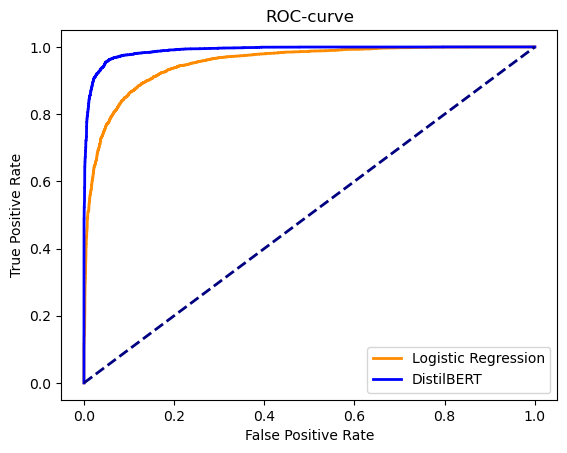

In [94]:
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression')
plt.plot(fpr_llm, tpr_llm, color='blue', lw=2, label='DistilBERT')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend()
#plt.show()
plt.savefig(r'C:\Users\Sten\Documents\EUR BAM\Thesis\graphs\roc.png')

In [36]:
auc_llm = auc(fpr_llm, tpr_llm)
print('AUC for DistilBERT:', round(auc_llm, 2))
auc_lr = auc(fpr_lr, tpr_lr)
print('AUC for logistic regression:', round(auc_lr, 2))

AUC for DistilBERT: 0.99
AUC for logistic regression: 0.95
